In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")

In [2]:
data=pd.read_csv("Data_Train.csv")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
for i in data:
  print(i,data[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route ['BLR ? DEL' 'CCU ? IXR ? BBI ? BLR' 'DEL ? LKO ? BOM ? COK'
 'CCU ? NAG ? BLR

In [5]:
data.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [6]:
data.Date_of_Journey = data.Date_of_Journey.str.split('/')
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [7]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [8]:
data.Route=data.Route.str.split('→')
data.Route

0                    [BLR ? DEL]
1        [CCU ? IXR ? BBI ? BLR]
2        [DEL ? LKO ? BOM ? COK]
3              [CCU ? NAG ? BLR]
4              [BLR ? NAG ? DEL]
                  ...           
10678                [CCU ? BLR]
10679                [CCU ? BLR]
10680                [BLR ? DEL]
10681                [BLR ? DEL]
10682    [DEL ? GOI ? BOM ? COK]
Name: Route, Length: 10683, dtype: object

In [9]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]


In [10]:
data.Dep_Time=data.Dep_Time.str.split(':')

In [11]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [12]:
data.Arrival_Time=data.Arrival_Time.str.split(' ')

In [13]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [14]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')

In [15]:
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [16]:
data.Duration=data.Duration.str.split(' ')

In [17]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]
data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [18]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [19]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [20]:
data.Additional_Info.replace('No Info','No Info',inplace=True)

In [21]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                10683
City3                10683
City4                10683
City5                10683
City6                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date          6348
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins           1032
dtype: int64

In [22]:
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [23]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)
data.drop(['Time_of_Arrival'],axis=1,inplace=True)

In [24]:
data.isnull().sum()

Airline                  0
Source                   0
Destination              0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                10683
City3                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date          6348
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins           1032
dtype: int64

In [25]:
data['City3'].fillna('None',inplace=True)

In [26]:
data['Arrival_date'].fillna(data['Date'],inplace=True)

In [27]:
data['Travel_Mins'].fillna(0,inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10683 non-null  object 
 1   Source             10683 non-null  object 
 2   Destination        10683 non-null  object 
 3   Total_Stops        10682 non-null  object 
 4   Additional_Info    10683 non-null  object 
 5   Price              10683 non-null  int64  
 6   Date               10683 non-null  object 
 7   Month              10683 non-null  object 
 8   Year               10683 non-null  object 
 9   City1              10682 non-null  object 
 10  City2              0 non-null      float64
 11  City3              10683 non-null  object 
 12  Dep_Time_Hour      10683 non-null  object 
 13  Dep_Time_Mins      10683 non-null  object 
 14  Arrival_date       10683 non-null  object 
 15  Arrival_Time_Hour  10683 non-null  object 
 16  Arrival_Time_Mins  106

In [29]:
try:
    as_int = int(64)
except ValueError:
    
 data.Total_Stops=data.Total_Stops.astype('int64')
 data.Date=data.Date.astype('int64')
 data.Month=data.Month.astype('int64')
 data.Year=data.Year.astype('int64')
 data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
 data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
 data.Arrival_date=data.Arrival_date.astype('int64')
 data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64')
 data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64')
 data.Travel_Mins=data.Travel_Mins.astype('int64')  

In [30]:
data[data['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,03,2019,BOM ? GOI ? PNQ ? HYD,NaN,None,16,50,6,16,55,5m,0


In [31]:
data.drop(index=6474,inplace=True,axis=0)

In [32]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

In [33]:
categorical=['Airline','Source','Destination','Additional_Info','City']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Travel_Hours','Travel_Mins','Price']

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.City1=le.fit_transform(data.City1)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,8,3897,24,03,2019,18,0,0,22,20,22,01,10,2,50
1,1,3,0,1,8,7662,1,05,2019,84,0,0,05,50,1,13,15,7,25
2,4,2,1,1,8,13882,9,06,2019,118,0,0,09,25,10,04,25,19,0
3,3,3,0,0,8,6218,12,05,2019,91,0,0,18,05,12,23,30,5,25
4,3,0,5,0,8,13302,01,03,2019,29,0,0,16,50,01,21,35,4,45


In [36]:
data= data[['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Price']]

In [37]:
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,3,0,5,24,03,2019,22,20,22,01,10,3897
1,1,3,0,1,05,2019,05,50,1,13,15,7662
2,4,2,1,9,06,2019,09,25,10,04,25,13882
3,3,3,0,12,05,2019,18,05,12,23,30,6218
4,3,0,5,01,03,2019,16,50,01,21,35,13302


In [38]:
data.describe()

,Airline,Source,Destination,Price
count,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952069,1.435967,9086.292735
std,2.352090,1.177110,1.474773,4610.885695
min,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,5277.000000
50%,4.000000,2.000000,1.000000,8372.000000
75%,4.000000,3.000000,2.000000,12373.000000
max,11.000000,4.000000,5.000000,79512.000000


In [39]:
df = pd.read_csv("Data_Train.csv")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64


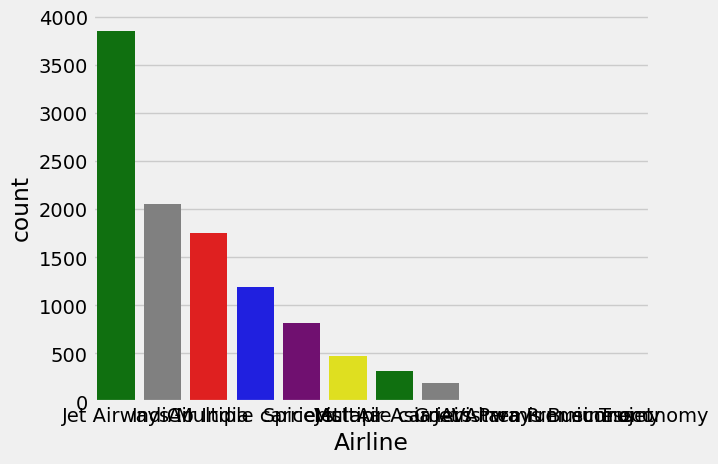

In [40]:
freqs = df["Airline"].value_counts()
order = freqs.index.tolist()
cols = ["green","grey","red","blue","purple","yellow"]
ax = sns.countplot(x=df["Airline"], order=order, palette=cols)
print(freqs)

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64


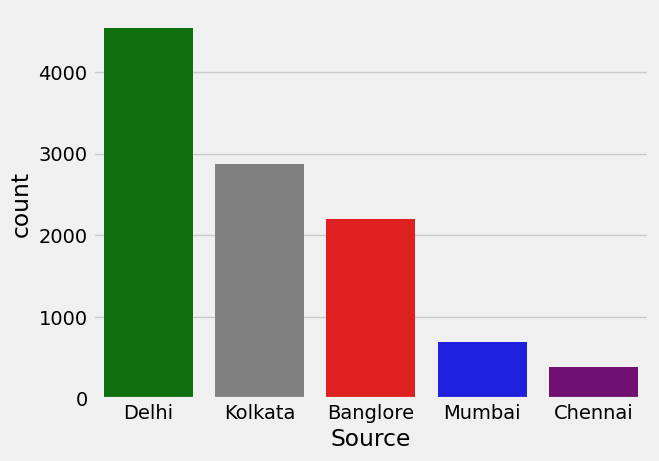

In [41]:
freqs2 = df["Source"].value_counts()
order = freqs2.index.tolist()
cols = ["green","grey","red","blue","purple","yellow"]
ax = sns.countplot(x=df["Source"], order=order, palette=cols)
print(freqs2)

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64


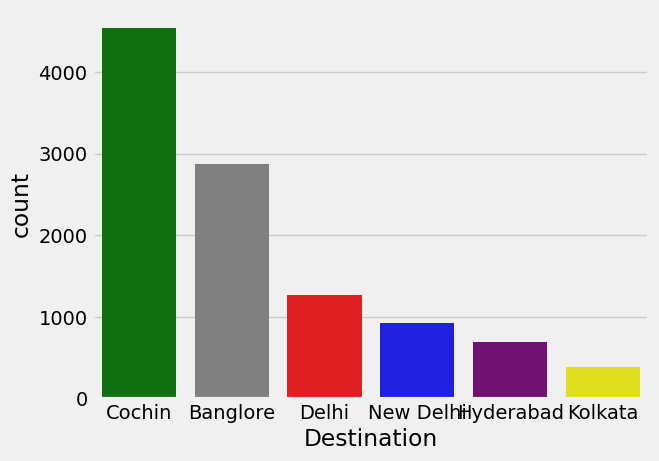

In [42]:
freqs3 = df["Destination"].value_counts()


order = freqs3.index.tolist()


cols = ["green","grey","red","blue","purple","yellow"]

ax = sns.countplot(x=df["Destination"], order=order, palette=cols)
print(freqs3)

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


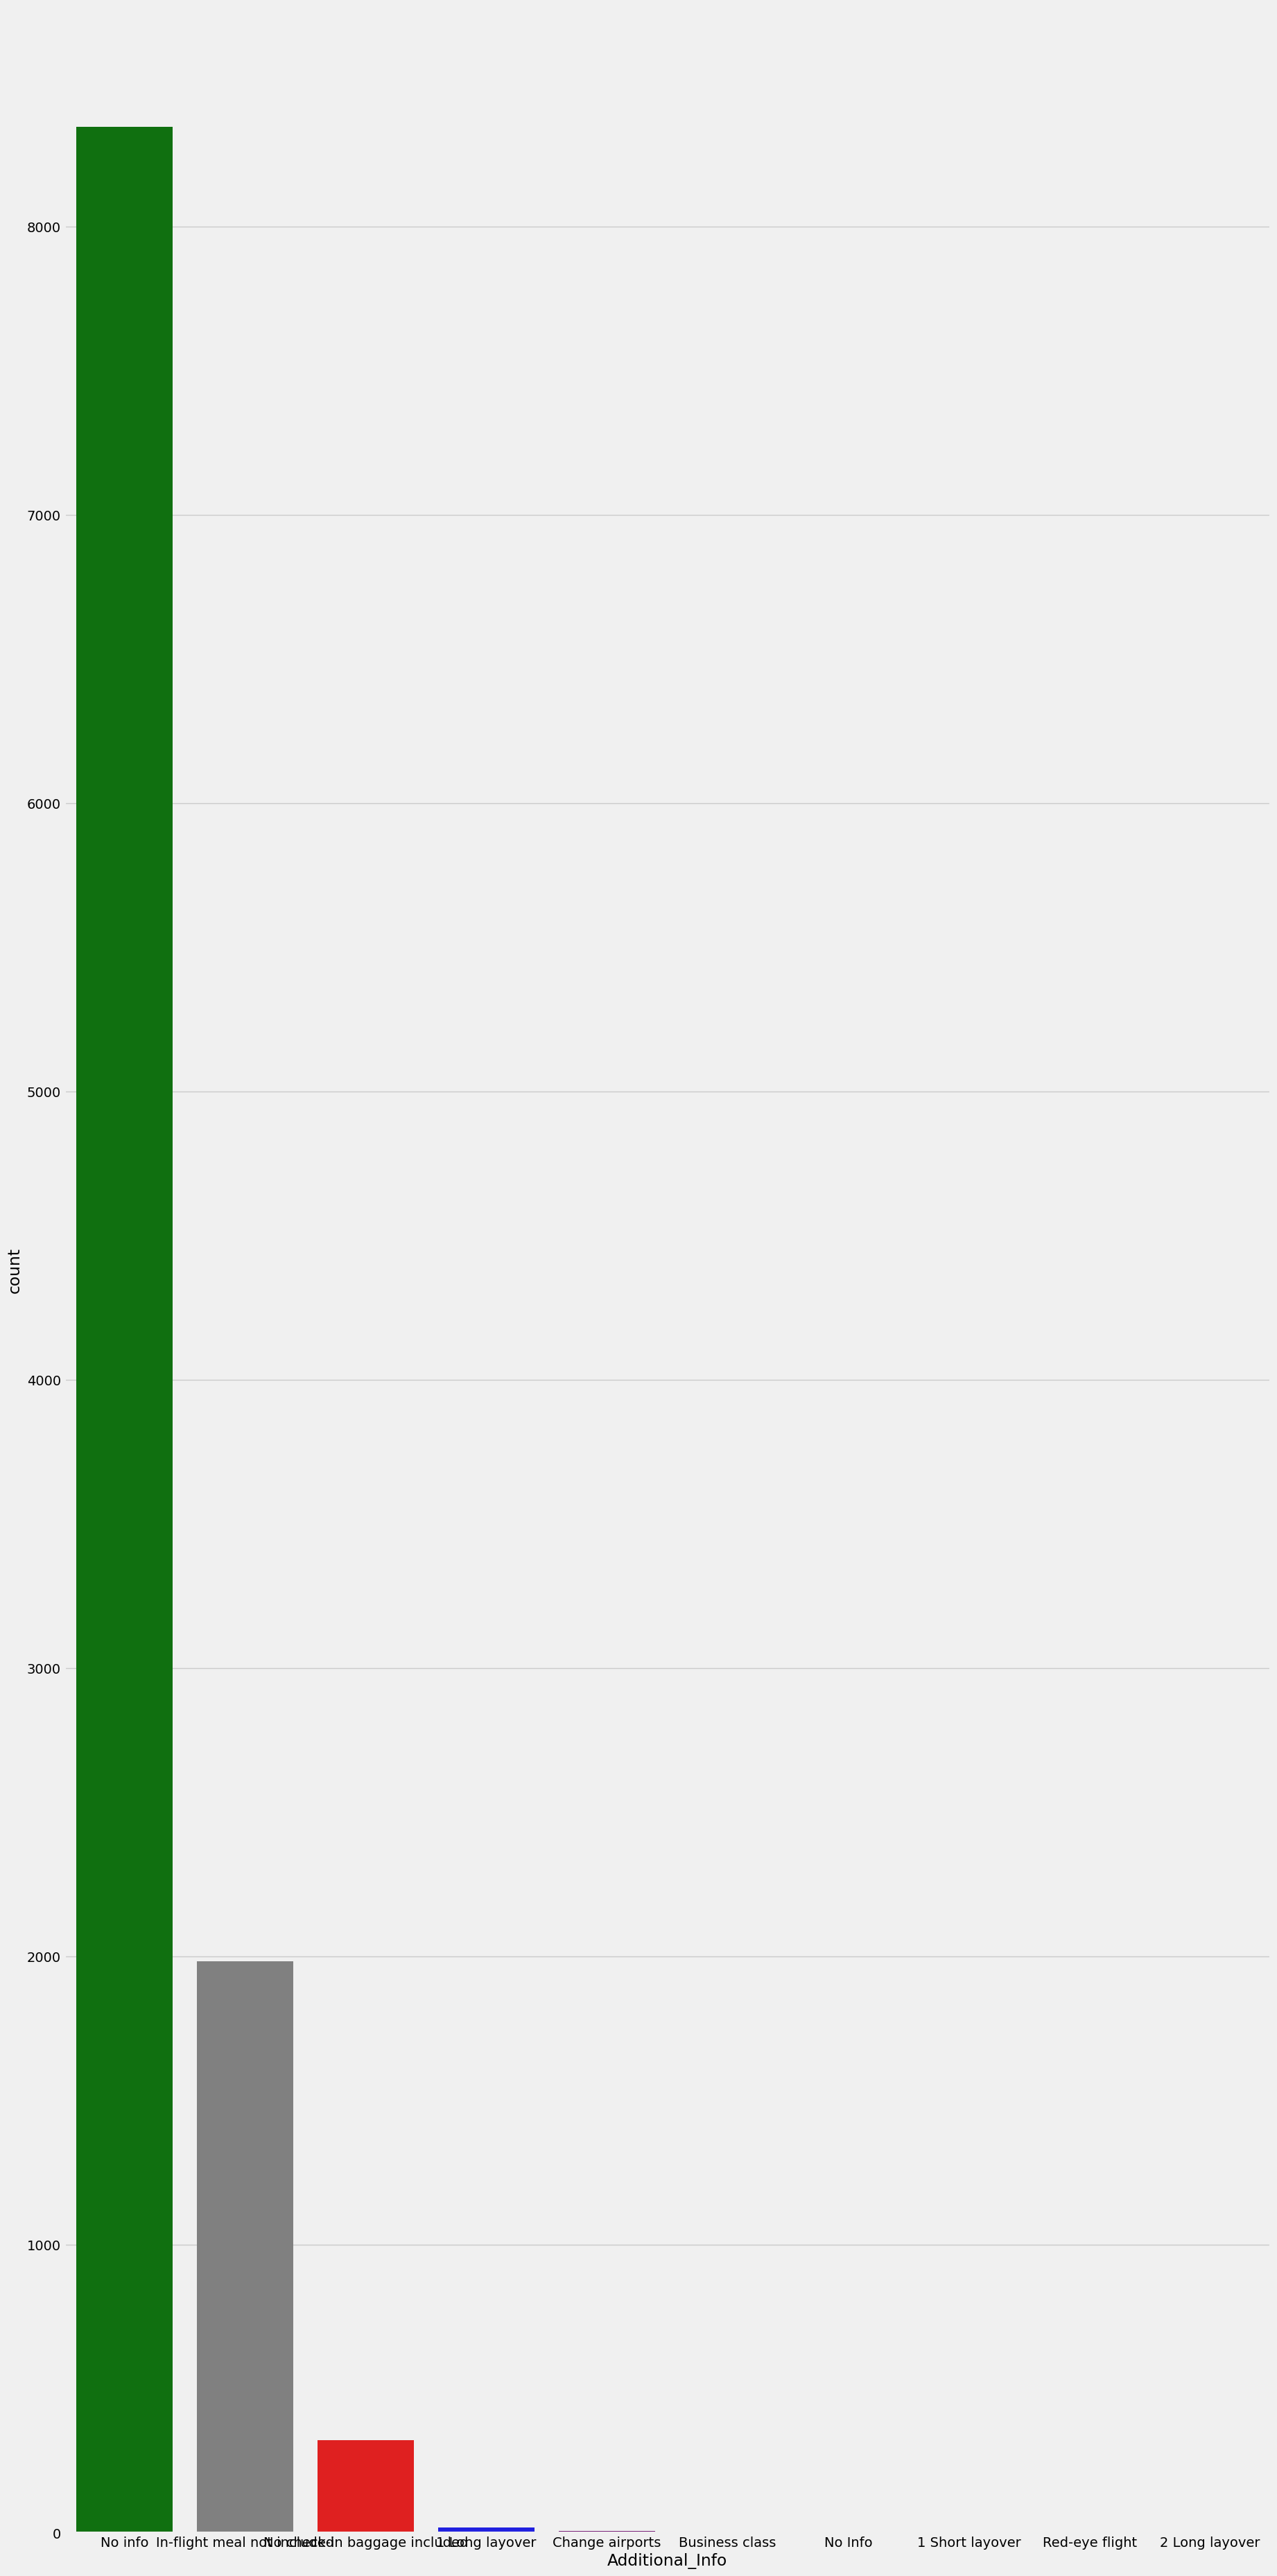

In [43]:
plt.figure(figsize=(20,45))
freqs4 = df["Additional_Info"].value_counts()


order = freqs4.index.tolist()


cols = ["green","grey","red","blue","purple","yellow"]

ax = sns.countplot(x=df["Additional_Info"], order=order, palette=cols)
print(freqs4)

Route
DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: count, Length: 128, dtype: int64


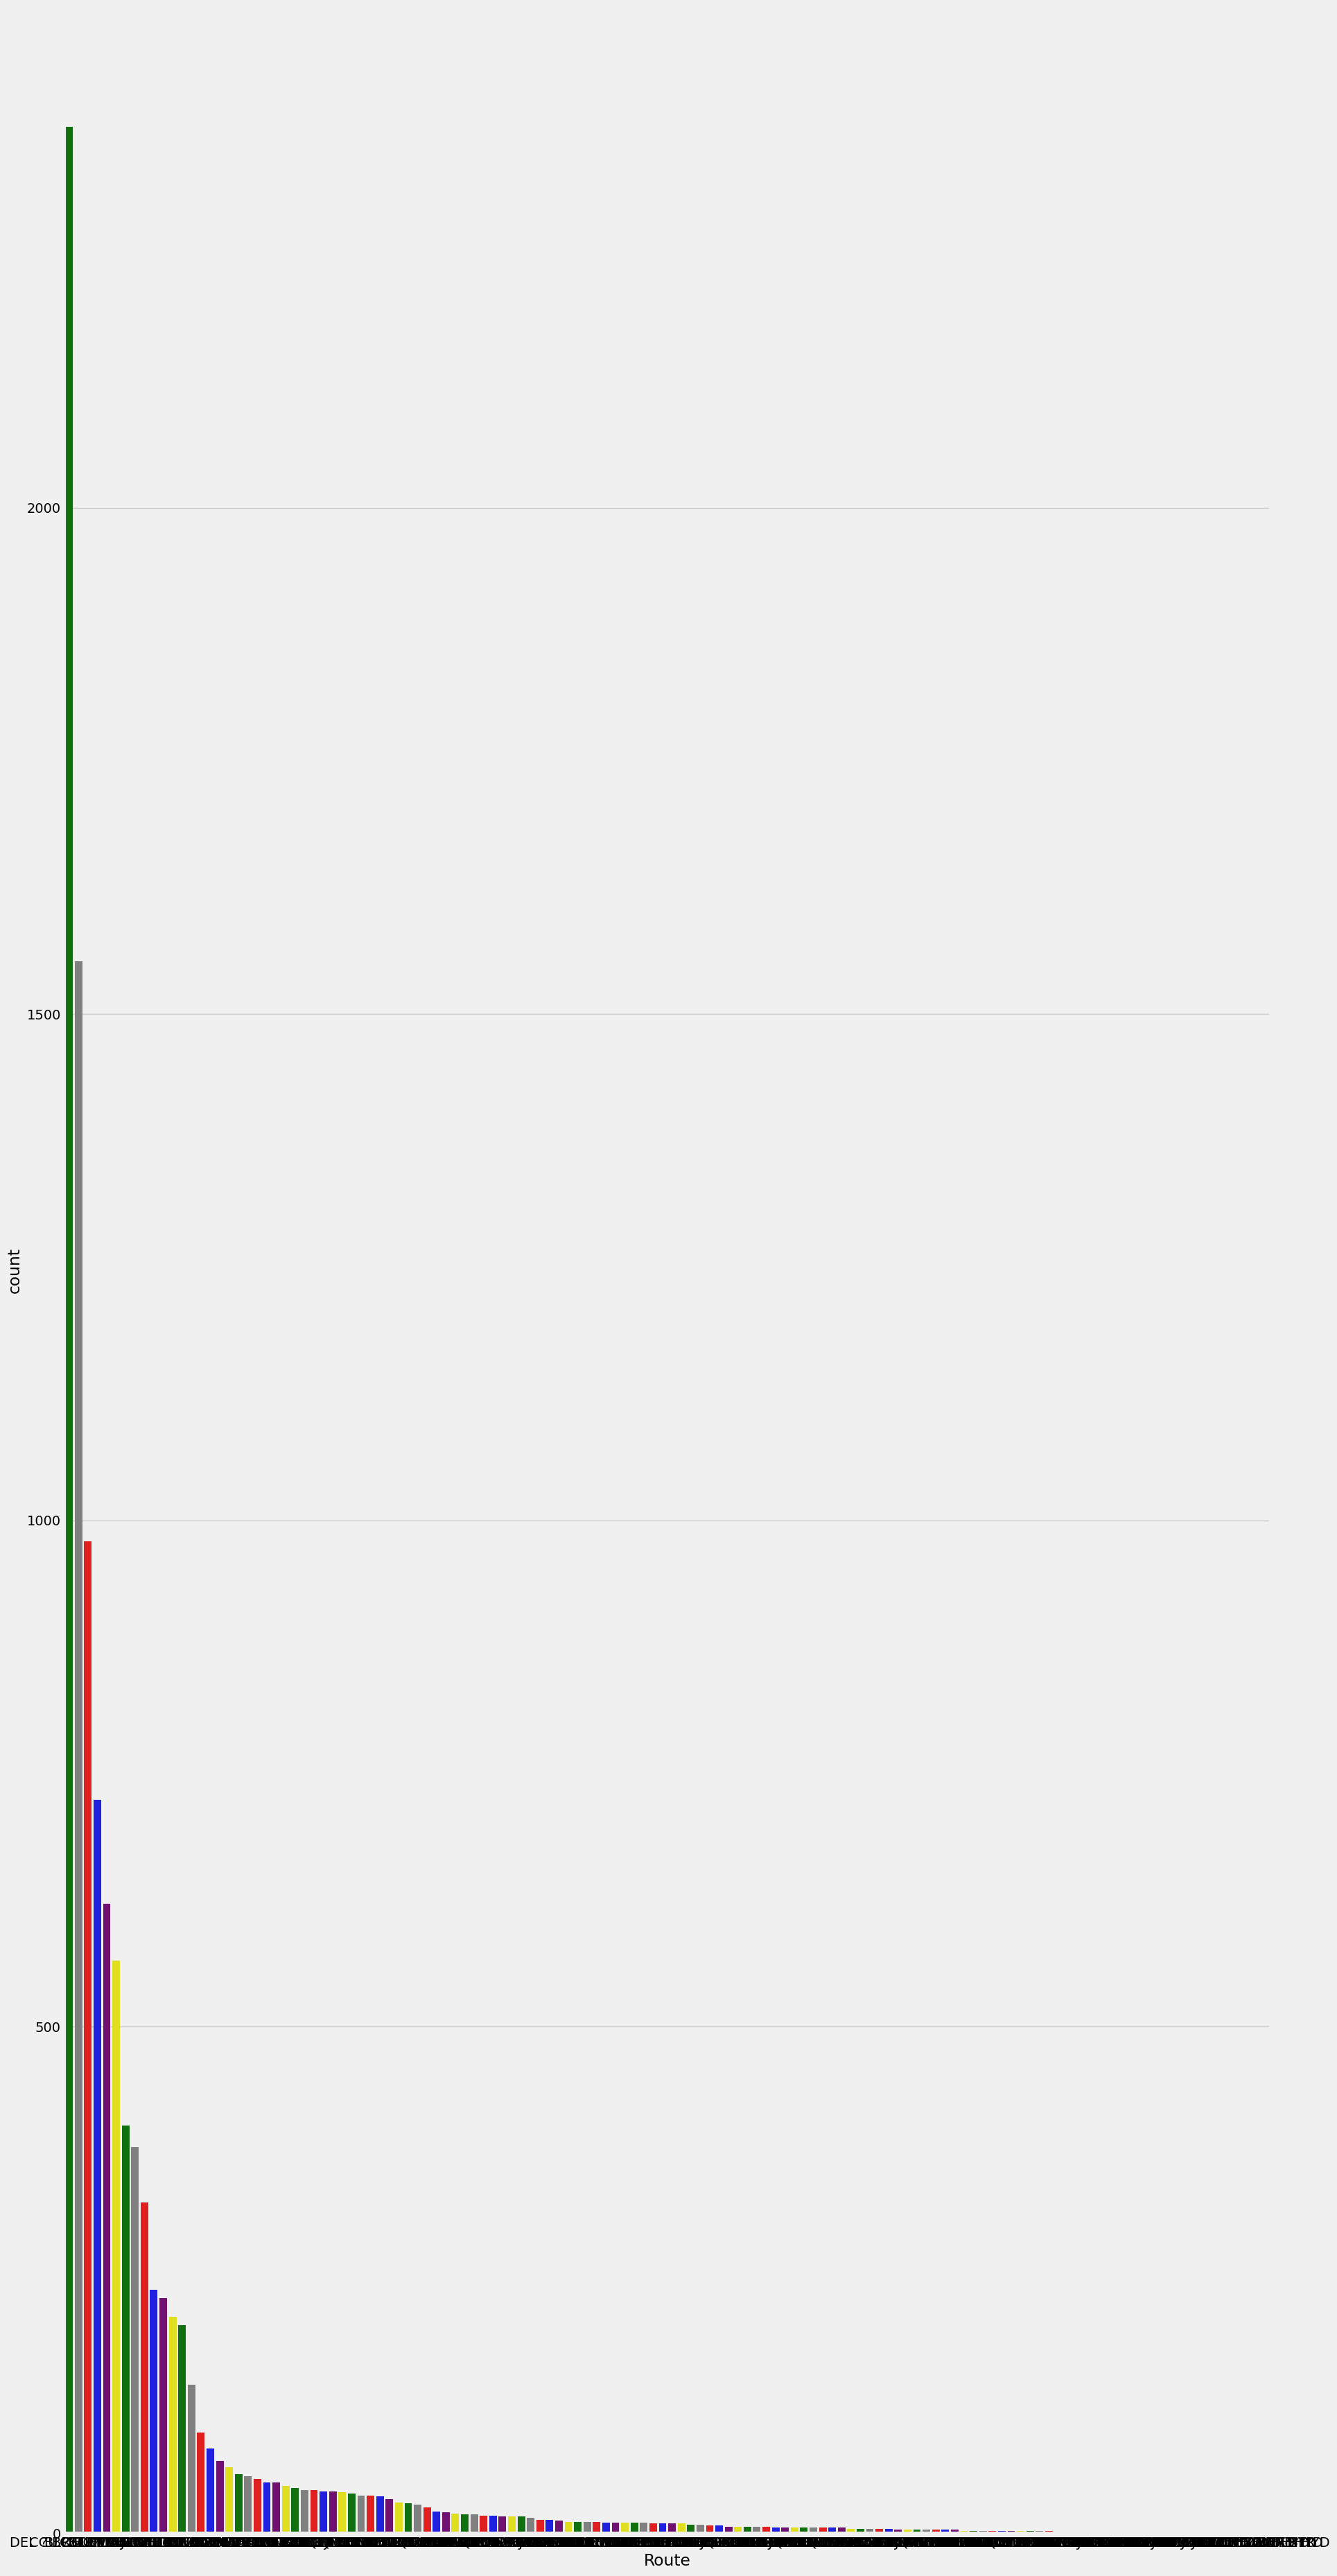

In [44]:
plt.figure(figsize=(20,45))
freq9 = df["Route"].value_counts()

order = freq9.index.tolist()


cols = ["green","grey","red","blue","purple","yellow"]

ax = sns.countplot(x=df["Route"], order=order, palette=cols)
print(freq9)

<AxesSubplot: xlabel='Price', ylabel='Density'>

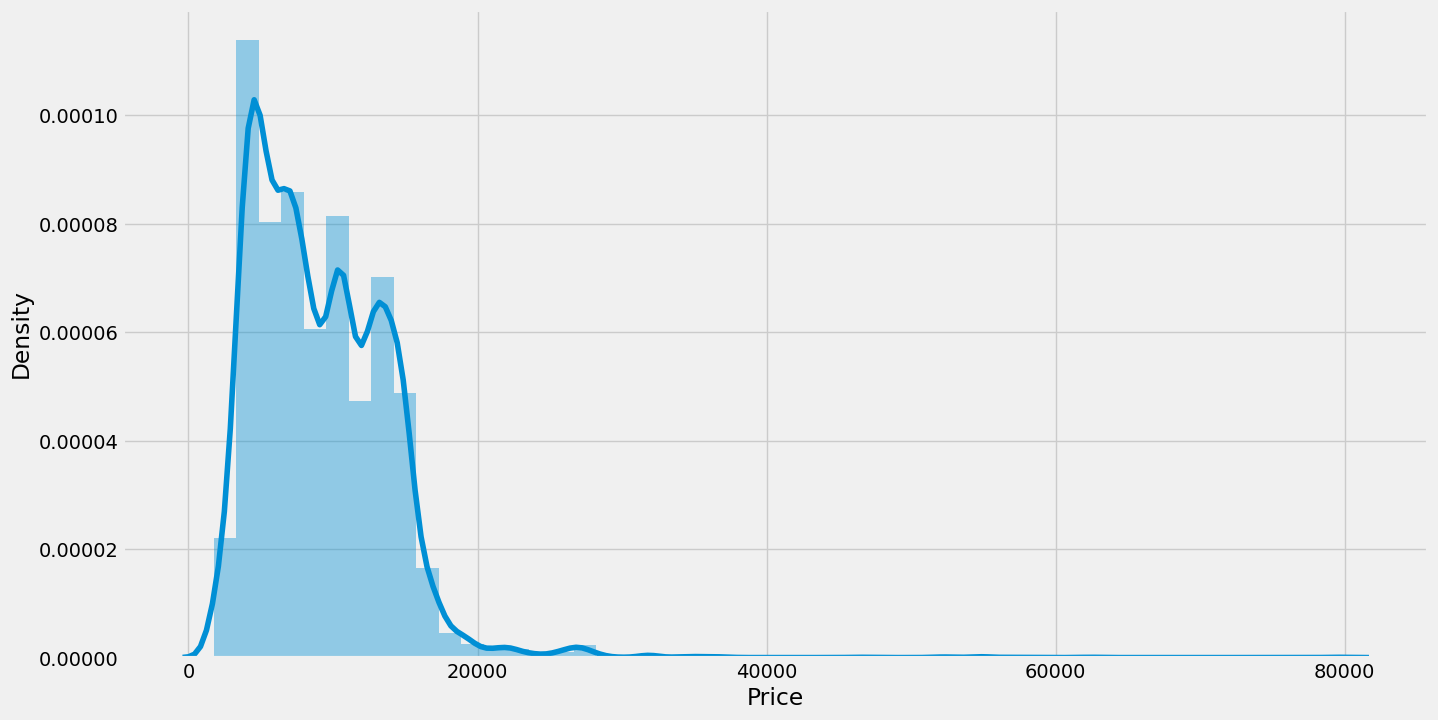

In [45]:
plt.figure(figsize=(15,8))
sns.distplot(data.Price)

<AxesSubplot: >

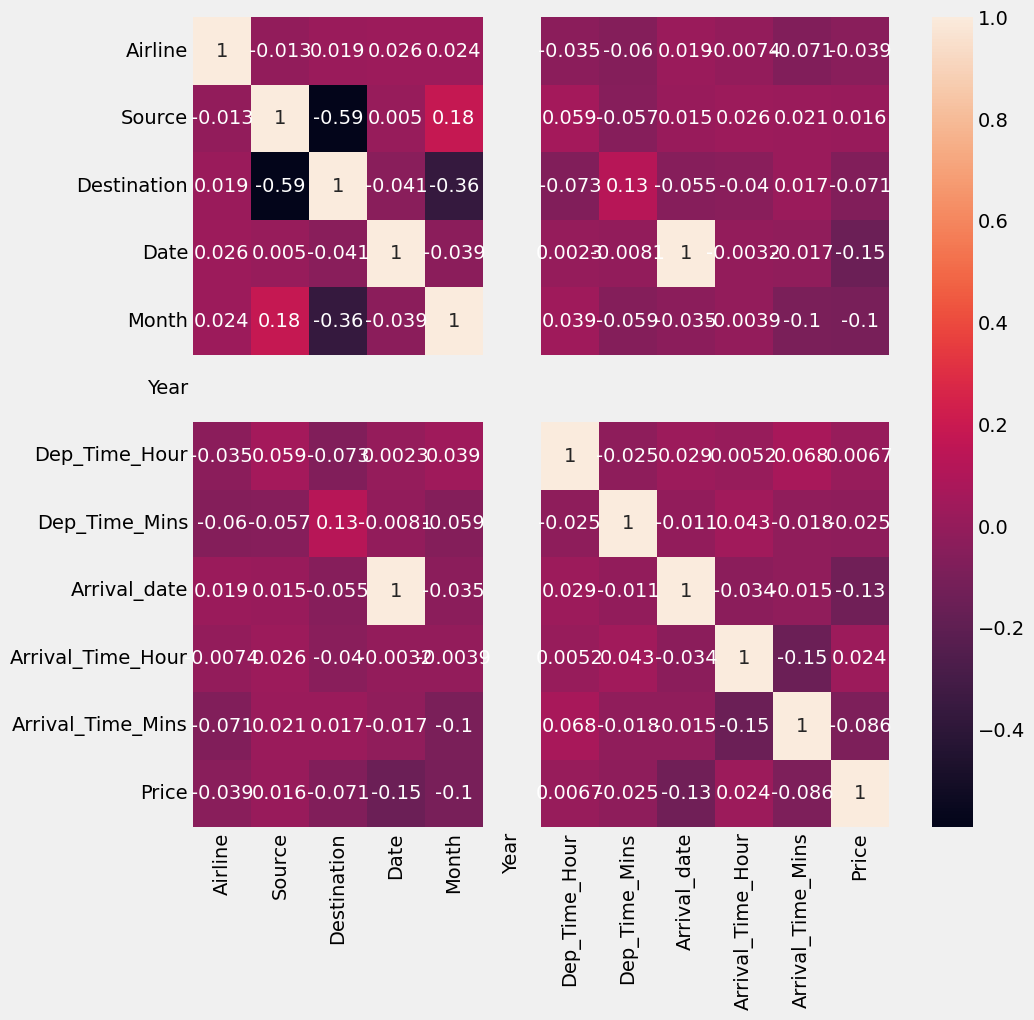

In [46]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),annot=True)

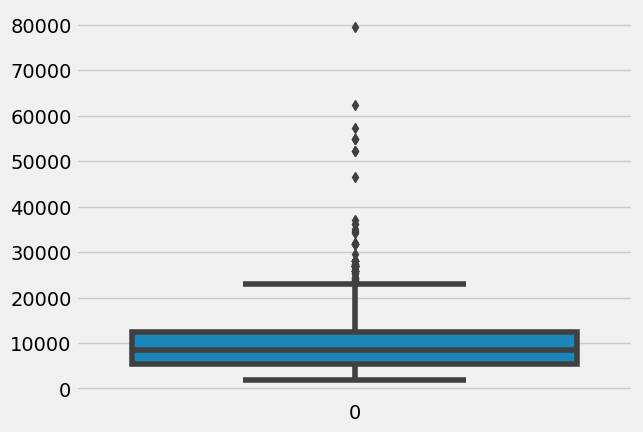

In [47]:
import seaborn as sns
sns.boxplot(data.Price);

In [48]:
y=data['Price']
x=data.drop(columns=['Price'],axis=1)

In [49]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [50]:
x_scaled = ss.fit_transform(x)

In [51]:
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins
0,-0.410805,-1.658435,2.416778,1.237288,-1.467707,0.0,1.654268,-0.234932,0.955750,-1.800319,-0.889984
1,-1.261152,0.890299,-0.973732,-1.475307,0.250153,0.0,-1.303000,1.363674,-1.524648,-0.050813,-0.587017
2,0.014369,0.040721,-0.295630,-0.531796,1.109082,0.0,-0.607172,0.031502,-0.461621,-1.362943,0.018918
3,-0.410805,0.890299,-0.973732,-0.177979,0.250153,0.0,0.958440,-1.034235,-0.225392,1.407109,0.321885
4,-0.410805,-1.658435,2.416778,-1.475307,-1.467707,0.0,0.610527,1.363674,-1.524648,1.115525,0.624852


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
x_train.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins
10005,6,2,1,27,05,2019,08,30,27,19,15
3684,4,2,1,9,05,2019,11,30,10,12,35
1034,8,2,1,24,04,2019,15,45,24,22,05
3909,6,2,1,21,03,2019,12,50,22,01,35
3088,1,2,1,24,06,2019,17,15,25,19,15


In [54]:
y_train.head()

10005     9149
3684     12373
1034      5583
3909      7695
3088     11972
Name: Price, dtype: int64

In [55]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

for i in [rfr, gb, ad]:
    i.fit(x_train,y_train)  
    y_pred = i.predict(x_test)
    test_score = r2_score(y_test, y_pred)
    train_score = r2_score(y_train, i.predict(x_train))
    
    if abs(train_score - test_score) <= 0.2:
        print(i)
        print("R2 score is", r2_score(y_test, y_pred))
        print("R2 for train data", r2_score(y_train, i.predict(x_train)))
        print("Mean Absolute Error is", mean_absolute_error(y_pred, y_test))
        print("Mean Squared Error is", mean_squared_error(y_pred, y_test))
        print("Root Mean Squared Error is", mean_squared_error(y_pred, y_test, squared=False))


RandomForestRegressor()
R2 score is 0.8502846108813722
R2 for train data 0.9508486388479055
Mean Absolute Error is 1176.4468588782531
Mean Squared Error is 3164836.89449007
Root Mean Squared Error is 1778.9988461182515
GradientBoostingRegressor()
R2 score is 0.7652981292164748
R2 for train data 0.7338510043179753
Mean Absolute Error is 1682.5775080384815
Mean Squared Error is 4961367.994528509
Root Mean Squared Error is 2227.412847796409
AdaBoostRegressor()
R2 score is 0.2915600748669823
R2 for train data 0.3131598656858965
Mean Absolute Error is 3223.2172442693773
Mean Squared Error is 14975727.116563948
Root Mean Squared Error is 3869.8484617054382


In [57]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

for i in [rfr, gb, ad]:
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    test_score = r2_score(y_test, y_pred)
    train_score = r2_score(y_train, i.predict(x_train))
    
    if abs(train_score - test_score) <= 0.2:
        print(i)
        print("R2 score is", r2_score(y_test, y_pred))
        print("R2 for train data", r2_score(y_train, i.predict(x_train)))
        print("Mean Absolute Error is", mean_absolute_error(y_pred, y_test))
        print("Mean Squared Error is", mean_squared_error(y_pred, y_test))
        print("Root Mean Squared Error is", mean_squared_error(y_pred, y_test, squared=False))


RandomForestRegressor()
R2 score is 0.8517345744708501
R2 for train data 0.9505614927015492
Mean Absolute Error is 1174.4430178894831
Mean Squared Error is 3134186.0823680717
Root Mean Squared Error is 1770.3632628271723
GradientBoostingRegressor()
R2 score is 0.7653005906697318
R2 for train data 0.7338510043179753
Mean Absolute Error is 1682.531451790499
Mean Squared Error is 4961315.961814119
Root Mean Squared Error is 2227.4011676871587
AdaBoostRegressor()
R2 score is 0.37269559922454487
R2 for train data 0.3672817978704891
Mean Absolute Error is 3034.795462437527
Mean Squared Error is 13260601.487513548
Root Mean Squared Error is 3641.510879774156


In [59]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# y_true: ground truth target values
# y_pred: estimated target values

# Calculate R2 score
#r2 = r2_score(y_train, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_train, y_pred)

# Calculate MSE
mse = mean_squared_error(y_train, y_pred)

# Print the results
print("R2 score: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)

ValueError: Found input variables with inconsistent numbers of samples: [8545, 2137]

In [60]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
  cv=cross_val_score(rfr,x,y,cv=i)
  print(rfr,cv.mean())

RandomForestRegressor() 0.7919349125768858
RandomForestRegressor() 0.7923812626986181
RandomForestRegressor() 0.8020728255242886


In [61]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)
rf_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [62]:
RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1, param_distributions={'max_depth': [None, 1, 2,3], 'max_features': ['auto', 'sqrt'], 'n_estimators': [10,30,50,70,100]}, verbose=2)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [63]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)
gb_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [64]:

rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.9281916329073742
test accuracy 0.7699654348064604


In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))

train accuracy 0.8281855910741254
test accuracy 0.4757260814063813


In [66]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))

train accuracy 0.9316762477351489
test accuracy 0.7640287042305396


In [67]:
import pickle
pickle.dump(rfr,open('model.pkl','wb'))